In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [229]:
# importing cleaned data file
data = pd.read_csv('C:/Users/Anne_2/Documents/Ironhack/Classification_Dallas_Shootings/data/Dallas_cleaned.csv')

In [230]:
data.head()

,date,location,subject_statuses,subject_weapon,subject_race,subject_gender,latitude,longitude,month,season,officer_count_cat,street
0,2013-02-23,3000 Chihuahua Street,Injured,Handgun,Latin,M,NaN,NaN,2,winter,2 to 3,Chihuahua Street
1,2010-05-03,1300 N. Munger Boulevard,Injured,Handgun,Latin,M,NaN,NaN,5,spring,alone,N. Munger Boulevard
2,2006-04-03,6512 South Loop 12,Injured,Unarmed,Black,M,NaN,NaN,4,spring,alone,South Loop
3,2005-05-09,4900 Eastside Avenue,Shoot and Miss,Vehicle,Latin,M,NaN,NaN,5,spring,2 to 3,Eastside Avenue
4,2003-07-24,7728 S. Loop 12,Deceased,Handgun,Black,M,NaN,NaN,7,summer,2 to 3,S. Loop


In [231]:
# check data file
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               208 non-null    object 
 1   location           208 non-null    object 
 2   subject_statuses   208 non-null    object 
 3   subject_weapon     208 non-null    object 
 4   subject_race       208 non-null    object 
 5   subject_gender     208 non-null    object 
 6   latitude           203 non-null    float64
 7   longitude          203 non-null    float64
 8   month              208 non-null    int64  
 9   season             208 non-null    object 
 10  officer_count_cat  208 non-null    object 
 11  street             208 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 19.6+ KB


In [232]:
data.columns

Index(['date', 'location', 'subject_statuses', 'subject_weapon',
       'subject_race', 'subject_gender', 'latitude', 'longitude', 'month',
       'season', 'officer_count_cat', 'street'],
      dtype='object')

In [233]:
# Encoding target variable subject_statuses as oridnal by severity (0 - Shoot and Miss, 1 - Injured, 2 - Deceased)
codes_outcome = ['Shoot and Miss', 'Injured', 'Deceased']
encoder = OrdinalEncoder(categories=[codes_outcome]).fit(data[['subject_statuses']])
data['target'] = encoder.transform(data[['subject_statuses']])

In [234]:
# check recoding
pd.crosstab(data.subject_statuses, data.target)

target,0.0,1.0,2.0
subject_statuses,,,
Deceased,0,0,67
Injured,0,61,0
Shoot and Miss,80,0,0


## Feature selection

In [235]:
#Checking the influence of independent features on target for feature selection

In [236]:
# subject weapon
mod = ols('target ~ subject_weapon', data=data).fit()
anova_table=sm.stats.anova_lm(mod, typ=2)
print(anova_table)

                    sum_sq     df         F    PR(>F)
subject_weapon   17.539606    6.0  4.567325  0.000228
Residual        128.647894  201.0       NaN       NaN


In [237]:
# subject race
mod = ols('target ~ subject_race', data=data).fit()
anova_table=sm.stats.anova_lm(mod, typ=2)
print(anova_table)

                  sum_sq     df         F    PR(>F)
subject_race   13.765688    3.0  7.068826  0.000153
Residual      132.421812  204.0       NaN       NaN


In [238]:
# subject gender
mod = ols('target ~ subject_gender', data=data).fit()
anova_table=sm.stats.anova_lm(mod, typ=2)
print(anova_table)

                    sum_sq     df         F    PR(>F)
subject_gender    0.020012    1.0  0.028204  0.866794
Residual        146.167488  206.0       NaN       NaN


In [239]:
# month of year
mod = ols('target ~ month', data=data).fit()
anova_table=sm.stats.anova_lm(mod, typ=2)
print(anova_table)

              sum_sq     df         F    PR(>F)
month       0.084015    1.0  0.118457  0.731065
Residual  146.103485  206.0       NaN       NaN


In [240]:
# number of officers involved
mod = ols('target ~ officer_count_cat', data=data).fit()
anova_table=sm.stats.anova_lm(mod, typ=2)
print(anova_table)

                       sum_sq     df        F    PR(>F)
officer_count_cat   10.790017    2.0  8.16837  0.000386
Residual           135.397483  205.0      NaN       NaN


In [241]:
# season
mod = ols('target ~ season', data=data).fit()
anova_table=sm.stats.anova_lm(mod, typ=2)
print(anova_table)

              sum_sq     df         F    PR(>F)
season      1.082876    3.0  0.507465  0.677558
Residual  145.104624  204.0       NaN       NaN


### --> looks like subject_weapon, subject_race and number of officers involved are relevant 

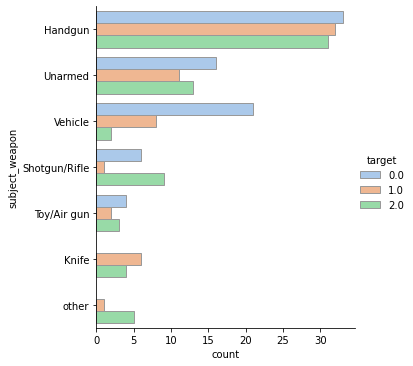

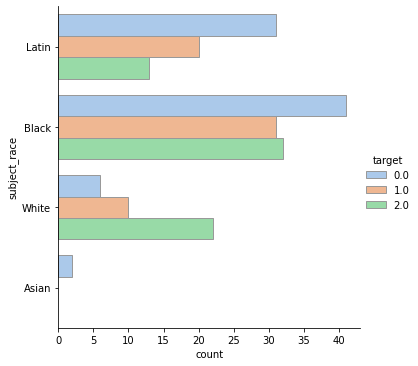

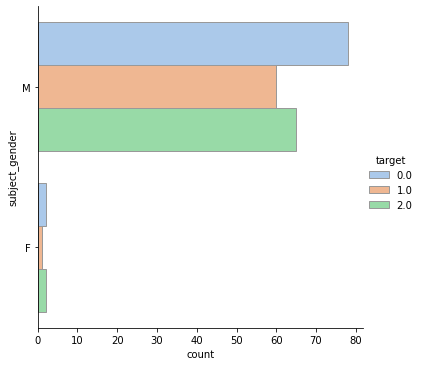

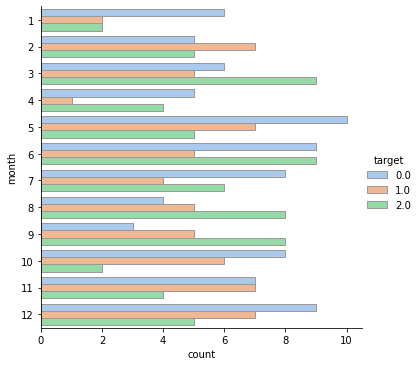

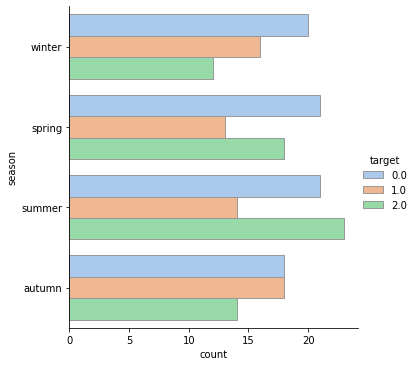

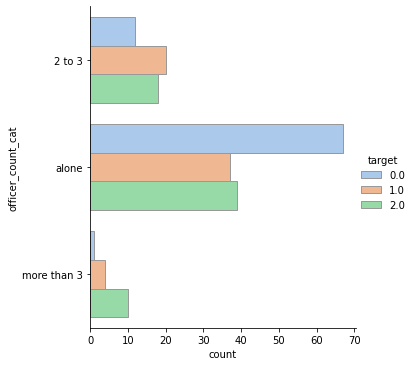

In [242]:
# also plotting all possible features in relaion to target
plotting = data[['subject_weapon', 'subject_race', 'subject_gender', 'month', 'season', 'officer_count_cat']]
for i in plotting.columns:
    sns.catplot(y=i, hue='target', kind='count', palette='pastel', edgecolor='.6', data=data)

# Builing first model - logistic regression